In [675]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv


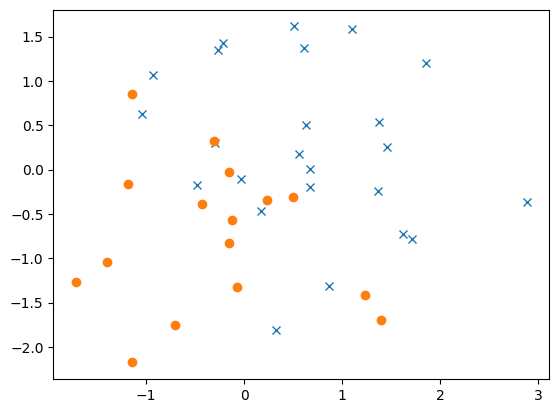

In [676]:
# prepare dataset
np.random.seed(3846)
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x = np.random.randn(n, 2) + 0
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')

# Problem 2.1

## Standard Proximal Gradient

In [677]:
# proximal gradient
def st_ops(mu, q):
  x_proj = np.zeros(mu.shape)
  for i in range(len(mu)):
    if mu[i] > q:
      x_proj[i] = mu[i] - q
    else:
      if np.abs(mu[i]) < q:
        x_proj[i] = 0
      else:
        x_proj[i] = mu[i] + q; 
  return x_proj

In [678]:
# condition
A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])
# lams = np.arange(0, 6, 0.1)
lams = np.arange(0.01, 10, 0.01)

w_init = np.array([[ 3],
                   [-1]])

In [679]:
max_eigen = np.max(np.linalg.eigvals(A))
L = 1 * max_eigen
lr = 1 / L

num_iter = 200

w_history = []
loss_history = []
min_fvalue = np.inf
min_lam = lams[0]

min_fvalue_hist = []

for lam in lams:
  w_hat_lam = []
  fvalues = []
  wt = w_init

  for t in range(num_iter):
    grad = np.dot(A, wt - mu)
    # print(grad.shape)
    wt = st_ops(wt - lr * grad, lam * 1 / L)
    fv = 1 / 2 * np.dot(np.dot((wt - mu).T, A), (wt - mu)) + lam * (np.abs(wt[0]) + np.abs(wt[1]))
    fv = fv[0][0]
    fvalues.append(fv)
    w_hat_lam.append(wt.T)

  min_fvalue_hist.append(min(fvalues))
  w_history.append(w_hat_lam[-1].reshape(-1))

  if min(fvalues) < min_fvalue:
    min_fvalue = min(fvalues)
    loss_history = fvalues[:]
    min_lam = lam


In [680]:
lr

0.3207149131818564

In [681]:
min_lam

0.01

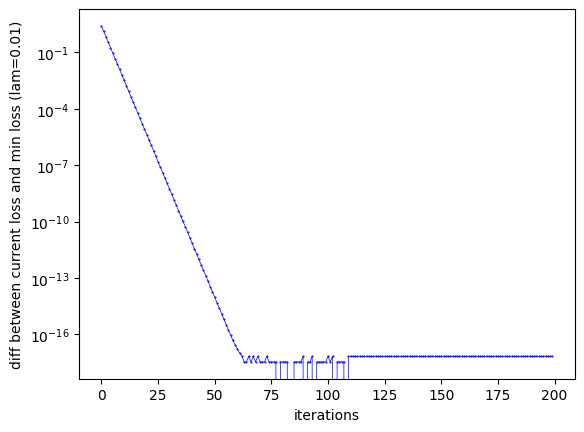

In [682]:
plt.plot(np.abs(loss_history - min_fvalue), 'bo-', linewidth=0.5, markersize=0.5)
plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel(f'diff between current loss and min loss (lam={min_lam})')
plt.show()

In [683]:
w_history

[array([0.99818182, 1.99090909]),
 array([0.99636364, 1.98181818]),
 array([0.99454545, 1.97272727]),
 array([0.99272727, 1.96363636]),
 array([0.99090909, 1.95454545]),
 array([0.98909091, 1.94545455]),
 array([0.98727273, 1.93636364]),
 array([0.98545455, 1.92727273]),
 array([0.98363636, 1.91818182]),
 array([0.98181818, 1.90909091]),
 array([0.98, 1.9 ]),
 array([0.97818182, 1.89090909]),
 array([0.97636364, 1.88181818]),
 array([0.97454545, 1.87272727]),
 array([0.97272727, 1.86363636]),
 array([0.97090909, 1.85454545]),
 array([0.96909091, 1.84545455]),
 array([0.96727273, 1.83636364]),
 array([0.96545455, 1.82727273]),
 array([0.96363636, 1.81818182]),
 array([0.96181818, 1.80909091]),
 array([0.96, 1.8 ]),
 array([0.95818182, 1.79090909]),
 array([0.95636364, 1.78181818]),
 array([0.95454545, 1.77272727]),
 array([0.95272727, 1.76363636]),
 array([0.95090909, 1.75454545]),
 array([0.94909091, 1.74545455]),
 array([0.94727273, 1.73636364]),
 array([0.94545455, 1.72727273]),
 arr

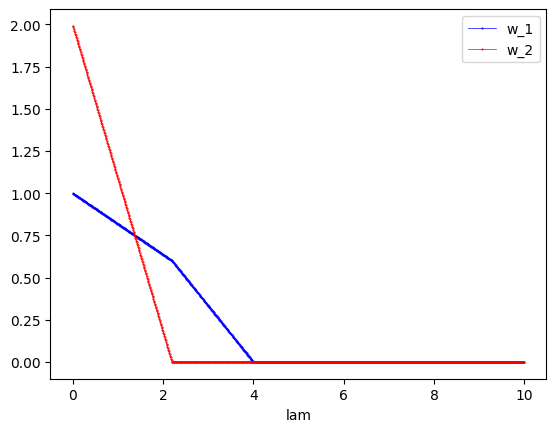

In [684]:
plt.plot(lams, [x[0] for x in w_history], 'bo-', linewidth=0.5, markersize=0.5, label='w_1')
plt.plot(lams, [x[1] for x in w_history], 'ro-', linewidth=0.5, markersize=0.5, label='w_2')
plt.legend()
plt.xlabel('lam')
plt.ylabel(f'')
plt.show()

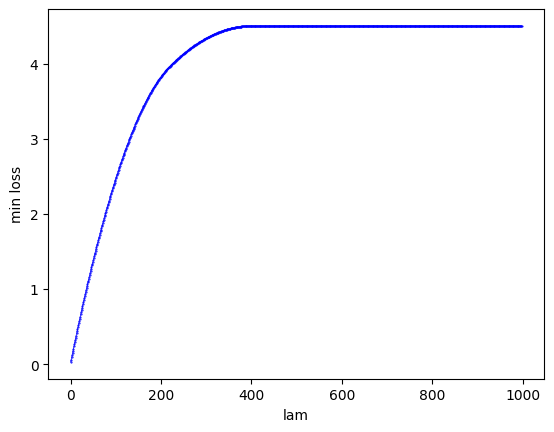

In [685]:
plt.plot(min_fvalue_hist, 'bo-', linewidth=0.5, markersize=0.5)
# plt.yscale('log')
plt.xlabel('lam')
plt.ylabel(f'min loss')
plt.show()

# Problem 2.2

In [686]:
# condition
A = np.array([[  300, 0.5],
              [0.5,   10]])
mu = np.array([[1],
               [2]])


max_eigen = np.max(np.linalg.eigvals(A))
L = 1 * max_eigen
lr = 1 / L

lams = np.arange(0.01, 10, 0.01)
num_iter = 200

w_init = np.array([[ 3],
                   [-1]])

min_lam = lams[0]
min_fvalue = np.inf

## Proximal Gradient

In [687]:
loss_history_pg = []
min_fvalue_hist_pg = []

for lam in lams:
  w_hat_lam = []
  fvalues = []
  wt = w_init

  for t in range(num_iter):
    grad = np.dot(A, wt - mu)
    wt = st_ops(wt - lr * grad, lam * 1 / L)
    fv = 1 / 2 * np.dot(np.dot((wt - mu).T, A), (wt - mu)) + lam * (np.abs(wt[0]) + np.abs(wt[1]))
    fv = fv[0][0]
    fvalues.append(fv)

  min_fvalue_hist_pg.append(min(fvalues))

  if min(fvalues) < min_fvalue:
    min_fvalue = min(fvalues)
    loss_history_pg = fvalues[:]
    min_lam = lam


## AdaGrad

In [688]:
delta = 0.02
eta0 = 500 / L

loss_history_adagrad = []
min_fvalue_hist_adagrad = []

for lam in lams:
  w_hat_lam = []
  fvalues = []
  g_history = []
  wt = w_init
  for t in range(num_iter):
    grad = np.dot(A, wt-mu)
    
    g_history.append(grad.flatten().tolist())
    ht = np.sqrt(np.sum(np.array(g_history)**2, axis=0).T) + delta
    ht = ht.reshape(-1, 1)
    
    eta_t = eta0
    wth = wt - eta_t * (ht**-1 * grad)
    ht_inv = ht ** -1
    wt = np.array([st_ops(wth[0], lam  * eta_t * ht_inv[0]),
                  st_ops(wth[1], lam  * eta_t * ht_inv[1])])
    
    fv = 1 / 2 * np.dot(np.dot((wt - mu).T, A), (wt - mu)) + lam * (np.abs(wt[0]) + np.abs(wt[1]))
    fv = fv[0][0]
    fvalues.append(fv)

  min_fvalue_hist_adagrad.append(min(fvalues))
  # print(min(fvalues))
  if min(fvalues) <= min_fvalue:
    min_fvalue = min(fvalues)
    loss_history_adagrad = fvalues[:]
    min_lam = lam

In [689]:
min_fvalue

0.029994849570797566

In [690]:
loss_history_adagrad

[25.379321742572525,
 2.640790605807042,
 0.5477566047568944,
 0.15107564361813214,
 0.059035144373937865,
 0.03698502617272851,
 0.031678325089345566,
 0.030400323632176793,
 0.030092511742809473,
 0.030018372493387034,
 0.030000515310907246,
 0.029996214223704597,
 0.029995178261832147,
 0.02999492873950941,
 0.02999486863942143,
 0.029994854163678357,
 0.029994850677041853,
 0.02999484983724832,
 0.029994849634975087,
 0.02999484958625541,
 0.029994849574520758,
 0.029994849571694335,
 0.02999484957101356,
 0.02999484957084959,
 0.029994849570810094,
 0.029994849570800588,
 0.029994849570798295,
 0.029994849570797743,
 0.029994849570797608,
 0.02999484957079758,
 0.029994849570797573,
 0.02999484957079757,
 0.029994849570797566,
 0.02999484957079757,
 0.02999484957079757,
 0.029994849570797566,
 0.029994849570797566,
 0.02999484957079757,
 0.02999484957079757,
 0.02999484957079757,
 0.02999484957079757,
 0.029994849570797566,
 0.029994849570797566,
 0.029994849570797566,
 0.02999484

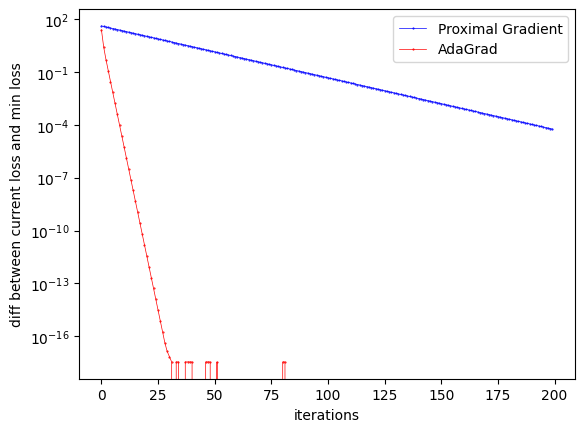

In [691]:

plt.plot(np.abs(loss_history_pg - min_fvalue), 'bo-', linewidth=0.5, markersize=0.5, label='Proximal Gradient')
plt.plot(np.abs(loss_history_adagrad - min_fvalue), 'ro-', linewidth=0.5, markersize=0.5, label='AdaGrad')
plt.legend()
plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel('diff between current loss and min loss')
plt.show()